In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)


In [2]:
meta = pd.read_csv("netflix_titles.csv")
meta.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies","Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first."
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,"Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of ""Sex on Fire"" in his comedy show."
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, Jeffrey Combs, Kevin Michael Richardson, Tania Gunadi, Josh Keaton, Steve Blum, Andy Pessoa, Ernie Hudson, Daran Norris, Will Friedle",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, Khary Payton, Mitchell Whitfield, Stuart Allan, Ted McGinley, Peter Cullen",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,"When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind."
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins, Keith Powers, Alicia Sanz, Jake Borelli, Kid Ink, Yousef Erakat, Rebekah Graf, Anne Winters, Peter Gilroy, Patrick Davis",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,"When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity."


In [3]:
movie = meta.rename(columns={"listed_in":"genre"})
movies = movie.drop(columns=['type', 'director', 'cast','country','date_added', 'release_year','duration'])
drop_movies = movies.dropna(subset=['rating'])
drop_movies

,show_id,title,rating,genre,description
0,81145628,Norm of the North: King Sized Adventure,TV-PG,"Children & Family Movies, Comedies","Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first."
1,80117401,Jandino: Whatever it Takes,TV-MA,Stand-Up Comedy,"Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of ""Sex on Fire"" in his comedy show."
2,70234439,Transformers Prime,TV-Y7-FV,Kids' TV,"With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron."
3,80058654,Transformers: Robots in Disguise,TV-Y7,Kids' TV,"When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind."
4,80125979,#realityhigh,TV-14,Comedies,"When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity."
...,...,...,...,...,...
6228,80159925,Kikoriki,TV-Y,Kids' TV,"A wacky rabbit and his gang of animal pals have fun solving problems, sharing stories and exploring their sometimes magical, always special world."
6229,80000063,Red vs. Blue,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy","This parody of first-person shooter games, military life and science-fiction films centers on a civil war fought in the middle of a desolate canyon."
6230,70286564,Maron,TV-MA,TV Comedies,"Marc Maron stars as Marc Maron, who interviews fellow comedians for his popular podcast, only to reveal more about his own neuroses and relationships."
6232,70281022,A Young Doctor's Notebook and Other Stories,TV-MA,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic miniseries is based on a doctor's memories of his early career working in an out-of-the-way village."


In [4]:
# split the genre on the , into a list
# movies_list = movies.assign(genre=movies.genre.str.split(',')).explode('genre')

drop_movies["rating"] = drop_movies["rating"].str.split('\s*,\s*')
# movies["genre"] = movies["genre"].str.split('\s*,\s*')
movies_list = drop_movies
movies_list

<ipython-input-4-abd5c651ad16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_movies["rating"] = drop_movies["rating"].str.split('\s*,\s*')


,show_id,title,rating,genre,description
0,81145628,Norm of the North: King Sized Adventure,[TV-PG],"Children & Family Movies, Comedies","Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first."
1,80117401,Jandino: Whatever it Takes,[TV-MA],Stand-Up Comedy,"Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of ""Sex on Fire"" in his comedy show."
2,70234439,Transformers Prime,[TV-Y7-FV],Kids' TV,"With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron."
3,80058654,Transformers: Robots in Disguise,[TV-Y7],Kids' TV,"When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind."
4,80125979,#realityhigh,[TV-14],Comedies,"When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity."
...,...,...,...,...,...
6228,80159925,Kikoriki,[TV-Y],Kids' TV,"A wacky rabbit and his gang of animal pals have fun solving problems, sharing stories and exploring their sometimes magical, always special world."
6229,80000063,Red vs. Blue,[NR],"TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy","This parody of first-person shooter games, military life and science-fiction films centers on a civil war fought in the middle of a desolate canyon."
6230,70286564,Maron,[TV-MA],TV Comedies,"Marc Maron stars as Marc Maron, who interviews fellow comedians for his popular podcast, only to reveal more about his own neuroses and relationships."
6232,70281022,A Young Doctor's Notebook and Other Stories,[TV-MA],"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic miniseries is based on a doctor's memories of his early career working in an out-of-the-way village."


In [5]:
# movies_list['genre'].nunique()
# genre_df = pd.DataFrame(movies_list.genre.unique())
genre_df = pd.DataFrame(movies_list['rating'].value_counts())
genre_df.reset_index()
genre_df

movies_list["rating"].explode().nunique()

14

In [6]:
grouped = movies_list.groupby('rating')
grouped

In [7]:
# g = grouped.nlargest(columns="genre", n = 50) 
# plt.figure(figsize=(12,15)) 
# ax = sns.barplot(data=g, x= "title count", y = "Genre") 
# ax.set(ylabel = 'Count') 
# plt.show()

In [8]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text


movies_list['clean_description'] = movies_list['description'].apply(lambda x: clean_text(x))
movies_list.head()

<ipython-input-8-8a14dd241e4f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_list['clean_description'] = movies_list['description'].apply(lambda x: clean_text(x))


,show_id,title,rating,genre,description,clean_description
0,81145628,Norm of the North: King Sized Adventure,[TV-PG],"Children & Family Movies, Comedies","Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.",before planning an awesome wedding for his grandfather a polar bear king must take back a stolen artifact from an evil archaeologist first
1,80117401,Jandino: Whatever it Takes,[TV-MA],Stand-Up Comedy,"Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of ""Sex on Fire"" in his comedy show.",jandino asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of sex on fire in his comedy show
2,70234439,Transformers Prime,[TV-Y7-FV],Kids' TV,"With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron.",with the help of three human allies the autobots once again protect earth from the onslaught of the decepticons and their leader megatron
3,80058654,Transformers: Robots in Disguise,[TV-Y7],Kids' TV,"When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind.",when a prison ship crash unleashes hundreds of decepticons on earth bumblebee leads a new autobot force to protect humankind
4,80125979,#realityhigh,[TV-14],Comedies,"When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity.",when nerdy high schooler dani finally attracts the interest of her longtime crush she lands in the cross hairs of his ex a social media celebrity


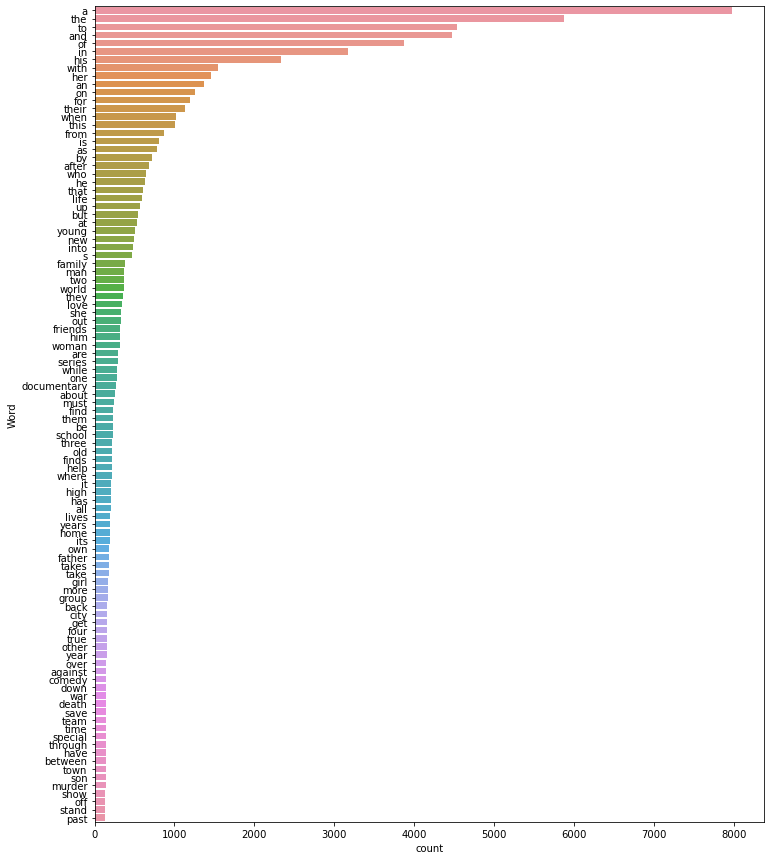

In [9]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(movies_list['clean_description'], 100)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\April\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_list['clean_description'] = movies_list['clean_description'].apply(lambda x: remove_stopwords(x))

<ipython-input-11-b76df8df5c30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_list['clean_description'] = movies_list['clean_description'].apply(lambda x: remove_stopwords(x))


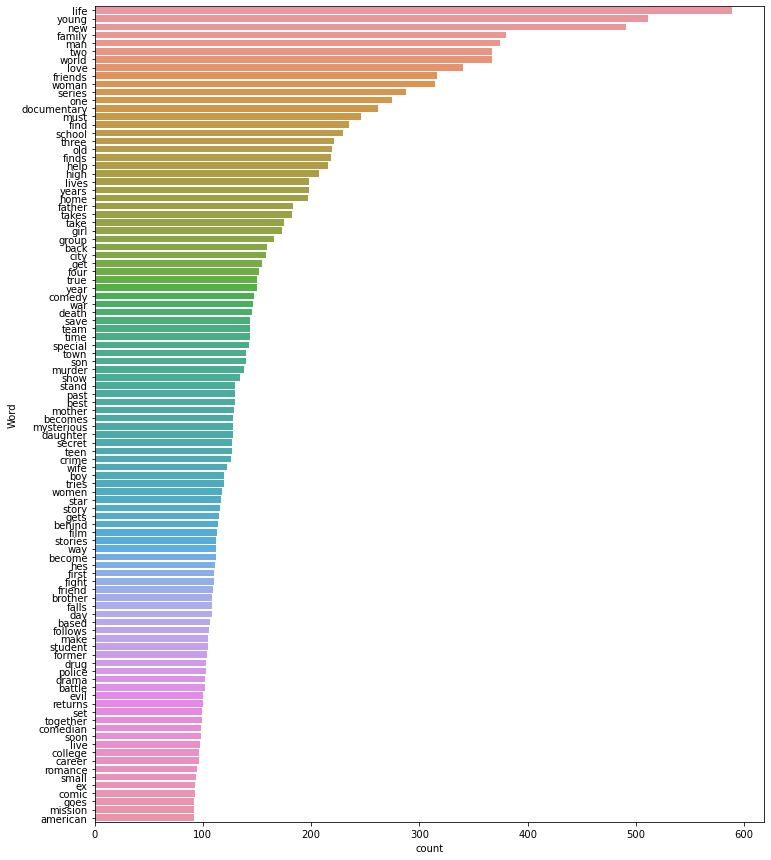

In [12]:
freq_words(movies_list['clean_description'], 100)

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_list['rating'])

# transform target variable
y = multilabel_binarizer.transform(movies_list['rating'])

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.3, max_features=200)

In [15]:
xtrain, xval, ytrain, yval = train_test_split(movies_list['clean_description'], y, test_size=0.01, random_state=9)

In [16]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [17]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [18]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [19]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [20]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [21]:
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
multilabel_binarizer.inverse_transform(y_pred)[3]

()

In [23]:
# evaluate performance
f1_score(yval, y_pred, average="micro")


0.16216216216216217

In [24]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [25]:
for i in range(10): 
  k = xval.sample(1).index[0] 
  print("Movie: ", movies_list['title'][k], "\nPredicted rating: ", infer_tags(xval[k])), print("Actual rating: ",movies_list['rating'][k], "\n")


Movie:  Once in a Lifetime Sessions with Snow Patrol 
Predicted rating:  [()]
Actual rating:  ['TV-MA'] 

Movie:  Death Race: Beyond Anarchy 
Predicted rating:  [()]
Actual rating:  ['R'] 

Movie:  Lupt 
Predicted rating:  [()]
Actual rating:  ['TV-14'] 

Movie:  Anon 
Predicted rating:  [()]
Actual rating:  ['TV-MA'] 

Movie:  Vanjagar Ulagam 
Predicted rating:  [()]
Actual rating:  ['TV-MA'] 

Movie:  The Tourist 
Predicted rating:  [()]
Actual rating:  ['PG-13'] 

Movie:  Chronicle of an Escape 
Predicted rating:  [()]
Actual rating:  ['R'] 

Movie:  Once in a Lifetime Sessions with Snow Patrol 
Predicted rating:  [()]
Actual rating:  ['TV-MA'] 

Movie:  The Day Will Come 
Predicted rating:  [()]
Actual rating:  ['TV-MA'] 

Movie:  The Perfect Dictatorship 
Predicted rating:  [()]
Actual rating:  ['NR'] 



In [38]:
test_desc = "There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, “Oh dear! Oh dear! I shall be late!” (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see it pop down a large rabbit-hole under the hedge."

print("Movie: ", "Silent Hill", "\nPredicted rating: ", infer_tags(test_desc)), print("Actual rating: ","R", "\n")

Movie:  Silent Hill 
Predicted rating:  [()]
Actual rating:  R 



(None, None)